# *ml-3-analyze-results.ipynb*

# Read results, pick out the best ones, and plot them.


In [1]:
import os, pandas as pd, matplotlib.pyplot as plt, numpy as np

In [2]:
files = os.listdir('../data/results')

In [3]:
files = [f for f in files if f[0]!='B']

In [4]:
def read_csv(file):
    
    with open('../data/results/' + file) as f:
        for lineid, line in enumerate(f):
            if line[:4] == ',Act':
                nbr_to_skip = lineid
                break
    
    df = pd.read_csv('../data/results/' + file,
                   skiprows=nbr_to_skip,
                   index_col=0)
  
    return df

In [5]:
dfs = [read_csv(f) for f in files]

In [6]:
info = [f[:-4].split('_') for f in files]

In [7]:
m = {'architecture': [i[0][:2] for i in info],
'model': [i[0] for i in info],
'tile': [i[3] for i in info],
'scheme': [i[4] for i in info],
'crop': [i[5] for i in info],
'in_season': [i[6] for i in info],
'precision_mean': [df.loc['Mean','Precision'] for df in dfs],
'recall_mean': [df.loc['Mean','Recall'] for df in dfs],
'f1_mean': [df.loc['Mean','F1'] for df in dfs],
'precision_stde': [df.loc['StdE','Precision'] for df in dfs],
'recall_stde': [df.loc['StdE','Recall'] for df in dfs],
'f1_stde': [df.loc['StdE','F1'] for df in dfs],
'file': files
    }

In [8]:
mdf = pd.DataFrame(m)

In [9]:
# Define a function that filters mdf down to a small specific df
def filter_mdf(architecture, tile, in_season):
# architecture must be the two-letter abbreviation
    Specs = {'architecture': architecture,
        'tile': tile,
        'in_season': in_season
            }
    Condition = []
    for key in Specs.keys():
        Condition.append(mdf[key]==str(Specs[key]))
    return mdf[Condition[0] & Condition[1] & Condition[2]]

In [10]:
# Establish hierarchical dictionary and fill it with small specific dfs
sdf = {}
for a in np.unique(m['architecture']):
    sdf[a] = {}
    for b in ['10SFH','15TVG']:
        sdf[a][b] = {}
        for c in ['160','230','None']:
            sdf[a][b][c] = filter_mdf(a, b, c)
        

In [12]:
# For each small specific df, name the top 5 models
# need to look at 

In [13]:
def read_hyperparameters(file):
    with open('../data/results/' + file) as f:
        for lineid, line in enumerate(f):
            if line[:7] in ('# model', '       '):
                print(line.rstrip())  

In [14]:
def display_best(sdf,
                 architecture,
                 tile,
                 in_season,
                 metrics = ['precision_mean','recall_mean','f1_mean']):
    
    in_season = str(in_season)
    
    files = [] # to also return the files
    for metric in metrics:
        w = sdf[architecture][tile][in_season].sort_values(metric,ascending=False).head(5)
        files += w['file'].values.tolist()
        print(f'Top 5 best {metric} for {architecture}, {tile}, {in_season}')
        display(w)
        
    for file in np.unique(files):
        read_hyperparameters(file)

In [15]:
for a in np.unique(m['architecture']):
    for b in ['10SFH','15TVG']:
        for c in ['160','230','None']:
            display_best(sdf,a,b,c)

Top 5 best precision_mean for ET, 10SFH, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
39,ET,ET004,10SFH,5day,75,160,0.925476,0.536209,0.656012,0.056986,0.178832,0.143786,ET004_0.001_0.001_10SFH_5day_75_160.csv
555,ET,ET047,10SFH,5day,75,160,0.922656,0.541203,0.656260,0.066010,0.189173,0.151394,ET047_0.001_0.001_10SFH_5day_75_160.csv
15,ET,ET002,10SFH,5day,75,160,0.921898,0.550426,0.663917,0.075649,0.186775,0.149402,ET002_0.001_0.001_10SFH_5day_75_160.csv
519,ET,ET044,10SFH,5day,75,160,0.921410,0.537837,0.656390,0.066162,0.177579,0.143031,ET044_0.001_0.001_10SFH_5day_75_160.csv
75,ET,ET007,10SFH,5day,75,160,0.920991,0.544501,0.658411,0.066863,0.190228,0.152076,ET007_0.001_0.001_10SFH_5day_75_160.csv


Top 5 best recall_mean for ET, 10SFH, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
156,ET,ET014,10SFH,14day,75,160,0.847669,0.690056,0.724787,0.119471,0.208113,0.144915,ET014_0.001_0.001_10SFH_14day_75_160.csv
540,ET,ET046,10SFH,14day,75,160,0.847496,0.688728,0.722466,0.117763,0.212424,0.142954,ET046_0.001_0.001_10SFH_14day_75_160.csv
276,ET,ET024,10SFH,14day,75,160,0.847946,0.687864,0.724579,0.114832,0.207008,0.143805,ET024_0.001_0.001_10SFH_14day_75_160.csv
180,ET,ET016,10SFH,14day,75,160,0.842358,0.686904,0.720464,0.120558,0.207700,0.144457,ET016_0.001_0.001_10SFH_14day_75_160.csv
252,ET,ET022,10SFH,14day,75,160,0.850515,0.685931,0.724633,0.119874,0.203717,0.142924,ET022_0.001_0.001_10SFH_14day_75_160.csv


Top 5 best f1_mean for ET, 10SFH, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
156,ET,ET014,10SFH,14day,75,160,0.847669,0.690056,0.724787,0.119471,0.208113,0.144915,ET014_0.001_0.001_10SFH_14day_75_160.csv
252,ET,ET022,10SFH,14day,75,160,0.850515,0.685931,0.724633,0.119874,0.203717,0.142924,ET022_0.001_0.001_10SFH_14day_75_160.csv
276,ET,ET024,10SFH,14day,75,160,0.847946,0.687864,0.724579,0.114832,0.207008,0.143805,ET024_0.001_0.001_10SFH_14day_75_160.csv
675,ET,ET057,10SFH,5day,75,160,0.861241,0.675620,0.724118,0.110038,0.204585,0.146340,ET057_0.001_0.001_10SFH_5day_75_160.csv
759,ET,ET064,10SFH,5day,75,160,0.858958,0.672015,0.723681,0.109014,0.197654,0.147003,ET064_0.001_0.001_10SFH_5day_75_160.csv


# model_name: ET002
# model: ExtraTreesClassifier(class_weight='balanced', max_features=0.05,
                     n_estimators=200, n_jobs=-1)
# model_name: ET004
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.05,
                     n_estimators=200, n_jobs=-1)
# model_name: ET007
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET014
# model: ExtraTreesClassifier(class_weight='balanced', max_features=0.1,
                     min_samples_split=4, n_estimators=200)
# model_name: ET016
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.1,
                     min_samples_split=4, n_estimators=200)
# model_name: ET022
# model: ExtraTreesClassifier(class_weight='balanced', max_features=0.2,
                     min_samples_split=4, n_estimators=200)
# model_name: ET024
# model: ExtraTreesClassifier(bootstrap=True,

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
508,ET,ET043,10SFH,5day,75,230,0.938570,0.522962,0.644111,0.070250,0.194418,0.159863,ET043_0.001_0.001_10SFH_5day_75_230.csv
28,ET,ET003,10SFH,5day,75,230,0.938355,0.540717,0.657241,0.070001,0.202242,0.161674,ET003_0.001_0.001_10SFH_5day_75_230.csv
40,ET,ET004,10SFH,5day,75,230,0.937440,0.514043,0.638870,0.065326,0.186494,0.155344,ET004_0.001_0.001_10SFH_5day_75_230.csv
76,ET,ET007,10SFH,5day,75,230,0.934772,0.538301,0.656513,0.066510,0.194865,0.156316,ET007_0.001_0.001_10SFH_5day_75_230.csv
520,ET,ET044,10SFH,5day,75,230,0.934746,0.513250,0.637004,0.071943,0.187338,0.154157,ET044_0.001_0.001_10SFH_5day_75_230.csv


Top 5 best recall_mean for ET, 10SFH, 230


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
364,ET,ET031,10SFH,5day,75,230,0.868627,0.687708,0.734880,0.109047,0.205477,0.149740,ET031_0.001_0.001_10SFH_5day_75_230.csv
796,ET,ET067,10SFH,5day,75,230,0.865636,0.686390,0.732683,0.107794,0.205506,0.148272,ET067_0.001_0.001_10SFH_5day_75_230.csv
844,ET,ET071,10SFH,5day,75,230,0.866846,0.685086,0.732195,0.108284,0.206356,0.149725,ET071_0.001_0.001_10SFH_5day_75_230.csv
457,ET,ET039,10SFH,14day,75,230,0.866594,0.684802,0.730973,0.111691,0.207479,0.150141,ET039_0.001_0.001_10SFH_14day_75_230.csv
412,ET,ET035,10SFH,5day,75,230,0.858827,0.684167,0.727183,0.112300,0.206565,0.149017,ET035_0.001_0.001_10SFH_5day_75_230.csv


Top 5 best f1_mean for ET, 10SFH, 230


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
364,ET,ET031,10SFH,5day,75,230,0.868627,0.687708,0.734880,0.109047,0.205477,0.149740,ET031_0.001_0.001_10SFH_5day_75_230.csv
796,ET,ET067,10SFH,5day,75,230,0.865636,0.686390,0.732683,0.107794,0.205506,0.148272,ET067_0.001_0.001_10SFH_5day_75_230.csv
340,ET,ET029,10SFH,5day,75,230,0.869012,0.684042,0.732294,0.113084,0.204874,0.151139,ET029_0.001_0.001_10SFH_5day_75_230.csv
844,ET,ET071,10SFH,5day,75,230,0.866846,0.685086,0.732195,0.108284,0.206356,0.149725,ET071_0.001_0.001_10SFH_5day_75_230.csv
772,ET,ET065,10SFH,5day,75,230,0.867124,0.682904,0.731074,0.109880,0.205013,0.148268,ET065_0.001_0.001_10SFH_5day_75_230.csv


# model_name: ET003
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, n_estimators=200,
                     n_jobs=-1)
# model_name: ET004
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.05,
                     n_estimators=200, n_jobs=-1)
# model_name: ET007
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET029
# model: ExtraTreesClassifier(max_features=0.4, min_samples_split=4, n_estimators=200,
                     n_jobs=-1)
# model_name: ET031
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.4, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET035
# model: ExtraTreesClassifier(bootstrap=True, max_features=1.0, n_estimators=200,
                     n_jobs=-1)
# model_name: ET039
# model: ExtraTreesClassifier(bootstrap=True, max_features=1.0, min_samples_split=4,
                

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
41,ET,ET004,10SFH,5day,75,None,0.935476,0.515261,0.636060,0.074273,0.196099,0.160214,ET004_0.001_0.001_10SFH_5day_75_None.csv
77,ET,ET007,10SFH,5day,75,None,0.935257,0.517080,0.638403,0.071476,0.194844,0.159956,ET007_0.001_0.001_10SFH_5day_75_None.csv
509,ET,ET043,10SFH,5day,75,None,0.932672,0.526440,0.643254,0.084027,0.199446,0.161889,ET043_0.001_0.001_10SFH_5day_75_None.csv
5,ET,ET001,10SFH,5day,75,None,0.931836,0.535910,0.651083,0.086727,0.200428,0.160273,ET001_0.001_0.001_10SFH_5day_75_None.csv
557,ET,ET047,10SFH,5day,75,None,0.931290,0.537164,0.650662,0.084707,0.203447,0.164230,ET047_0.001_0.001_10SFH_5day_75_None.csv


Top 5 best recall_mean for ET, 10SFH, None


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
842,ET,ET071,10SFH,14day,75,None,0.864193,0.682206,0.728450,0.110930,0.206770,0.148786,ET071_0.001_0.001_10SFH_14day_75_None.csv
365,ET,ET031,10SFH,5day,75,None,0.866560,0.679303,0.728379,0.111659,0.204817,0.148697,ET031_0.001_0.001_10SFH_5day_75_None.csv
845,ET,ET071,10SFH,5day,75,None,0.866155,0.678925,0.727254,0.114818,0.205727,0.150527,ET071_0.001_0.001_10SFH_5day_75_None.csv
458,ET,ET039,10SFH,14day,75,None,0.863107,0.678621,0.725679,0.112984,0.205127,0.147198,ET039_0.001_0.001_10SFH_14day_75_None.csv
794,ET,ET067,10SFH,14day,75,None,0.860712,0.678575,0.724847,0.111007,0.204992,0.145423,ET067_0.001_0.001_10SFH_14day_75_None.csv


Top 5 best f1_mean for ET, 10SFH, None


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
842,ET,ET071,10SFH,14day,75,None,0.864193,0.682206,0.728450,0.110930,0.206770,0.148786,ET071_0.001_0.001_10SFH_14day_75_None.csv
365,ET,ET031,10SFH,5day,75,None,0.866560,0.679303,0.728379,0.111659,0.204817,0.148697,ET031_0.001_0.001_10SFH_5day_75_None.csv
845,ET,ET071,10SFH,5day,75,None,0.866155,0.678925,0.727254,0.114818,0.205727,0.150527,ET071_0.001_0.001_10SFH_5day_75_None.csv
458,ET,ET039,10SFH,14day,75,None,0.863107,0.678621,0.725679,0.112984,0.205127,0.147198,ET039_0.001_0.001_10SFH_14day_75_None.csv
797,ET,ET067,10SFH,5day,75,None,0.865018,0.676737,0.725624,0.112934,0.205638,0.149900,ET067_0.001_0.001_10SFH_5day_75_None.csv


# model_name: ET001
# model: ExtraTreesClassifier(max_features=0.05, n_estimators=200, n_jobs=-1)
# model_name: ET004
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.05,
                     n_estimators=200, n_jobs=-1)
# model_name: ET007
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET031
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.4, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET039
# model: ExtraTreesClassifier(bootstrap=True, max_features=1.0, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET043
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, n_estimators=500,
                     n_jobs=-1)
# model_name: ET047
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, min_samples_split=4,
                     n_estimators=5

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
525,ET,ET044,15TVG,5day,1,160,0.806731,0.339155,0.458483,0.110387,0.102080,0.091558,ET044_0.001_0.001_15TVG_5day_1_160.csv
45,ET,ET004,15TVG,5day,1,160,0.794778,0.351827,0.466428,0.108418,0.111207,0.099895,ET004_0.001_0.001_15TVG_5day_1_160.csv
501,ET,ET042,15TVG,5day,1,160,0.792542,0.363648,0.479721,0.119136,0.099524,0.081576,ET042_0.001_0.001_15TVG_5day_1_160.csv
81,ET,ET007,15TVG,5day,1,160,0.791446,0.375427,0.490304,0.122789,0.097810,0.074783,ET007_0.001_0.001_15TVG_5day_1_160.csv
57,ET,ET005,15TVG,5day,1,160,0.788780,0.389467,0.502176,0.124993,0.098848,0.070150,ET005_0.001_0.001_15TVG_5day_1_160.csv


Top 5 best recall_mean for ET, 15TVG, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
546,ET,ET046,15TVG,14day,1,160,0.707363,0.516687,0.576760,0.130404,0.101907,0.047873,ET046_0.001_0.001_15TVG_14day_1_160.csv
66,ET,ET006,15TVG,14day,1,160,0.704234,0.514023,0.574252,0.128460,0.100665,0.045026,ET006_0.001_0.001_15TVG_14day_1_160.csv
90,ET,ET008,15TVG,14day,1,160,0.707092,0.513316,0.573711,0.128352,0.105891,0.046685,ET008_0.001_0.001_15TVG_14day_1_160.csv
570,ET,ET048,15TVG,14day,1,160,0.701398,0.512691,0.571365,0.128204,0.104542,0.048458,ET048_0.001_0.001_15TVG_14day_1_160.csv
186,ET,ET016,15TVG,14day,1,160,0.717968,0.500247,0.568925,0.131884,0.100682,0.044178,ET016_0.001_0.001_15TVG_14day_1_160.csv


Top 5 best f1_mean for ET, 15TVG, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
546,ET,ET046,15TVG,14day,1,160,0.707363,0.516687,0.576760,0.130404,0.101907,0.047873,ET046_0.001_0.001_15TVG_14day_1_160.csv
66,ET,ET006,15TVG,14day,1,160,0.704234,0.514023,0.574252,0.128460,0.100665,0.045026,ET006_0.001_0.001_15TVG_14day_1_160.csv
90,ET,ET008,15TVG,14day,1,160,0.707092,0.513316,0.573711,0.128352,0.105891,0.046685,ET008_0.001_0.001_15TVG_14day_1_160.csv
570,ET,ET048,15TVG,14day,1,160,0.701398,0.512691,0.571365,0.128204,0.104542,0.048458,ET048_0.001_0.001_15TVG_14day_1_160.csv
186,ET,ET016,15TVG,14day,1,160,0.717968,0.500247,0.568925,0.131884,0.100682,0.044178,ET016_0.001_0.001_15TVG_14day_1_160.csv


# model_name: ET004
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.05,
                     n_estimators=200, n_jobs=-1)
# model_name: ET005
# model: ExtraTreesClassifier(max_features=0.05, min_samples_split=4, n_estimators=200,
                     n_jobs=-1)
# model_name: ET006
# model: ExtraTreesClassifier(class_weight='balanced', max_features=0.05,
                     min_samples_split=4, n_estimators=200, n_jobs=-1)
# model_name: ET007
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET008
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.05,
                     min_samples_split=4, n_estimators=200, n_jobs=-1)
# model_name: ET016
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.1,
                     min_samples_split=4, n_estimators=200)
# model_name: ET042
# model: 

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
34,ET,ET003,15TVG,5day,1,230,0.813751,0.350169,0.471006,0.124935,0.095597,0.076272,ET003_0.001_0.001_15TVG_5day_1_230.csv
526,ET,ET044,15TVG,5day,1,230,0.810994,0.301704,0.417053,0.107129,0.114778,0.120615,ET044_0.001_0.001_15TVG_5day_1_230.csv
46,ET,ET004,15TVG,5day,1,230,0.810958,0.302989,0.419700,0.109250,0.108916,0.108113,ET004_0.001_0.001_15TVG_5day_1_230.csv
502,ET,ET042,15TVG,5day,1,230,0.807701,0.326677,0.444982,0.118408,0.104209,0.098958,ET042_0.001_0.001_15TVG_5day_1_230.csv
82,ET,ET007,15TVG,5day,1,230,0.806781,0.354406,0.474242,0.120410,0.096429,0.081163,ET007_0.001_0.001_15TVG_5day_1_230.csv


Top 5 best recall_mean for ET, 15TVG, 230


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
946,ET,ET079,15TVG,5day,1,230,0.712201,0.503990,0.572076,0.122110,0.097124,0.051612,ET079_0.001_0.001_15TVG_5day_1_230.csv
898,ET,ET075,15TVG,5day,1,230,0.708009,0.502363,0.569711,0.121522,0.097131,0.054414,ET075_0.001_0.001_15TVG_5day_1_230.csv
466,ET,ET039,15TVG,5day,1,230,0.705146,0.499105,0.567428,0.116416,0.095059,0.052503,ET039_0.001_0.001_15TVG_5day_1_230.csv
418,ET,ET035,15TVG,5day,1,230,0.709551,0.496114,0.564368,0.123078,0.102079,0.057253,ET035_0.001_0.001_15TVG_5day_1_230.csv
463,ET,ET039,15TVG,14day,1,230,0.707972,0.495575,0.564704,0.119248,0.099575,0.054481,ET039_0.001_0.001_15TVG_14day_1_230.csv


Top 5 best f1_mean for ET, 15TVG, 230


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
946,ET,ET079,15TVG,5day,1,230,0.712201,0.503990,0.572076,0.122110,0.097124,0.051612,ET079_0.001_0.001_15TVG_5day_1_230.csv
898,ET,ET075,15TVG,5day,1,230,0.708009,0.502363,0.569711,0.121522,0.097131,0.054414,ET075_0.001_0.001_15TVG_5day_1_230.csv
466,ET,ET039,15TVG,5day,1,230,0.705146,0.499105,0.567428,0.116416,0.095059,0.052503,ET039_0.001_0.001_15TVG_5day_1_230.csv
319,ET,ET027,15TVG,14day,1,230,0.728462,0.489992,0.567344,0.117502,0.101404,0.057904,ET027_0.001_0.001_15TVG_14day_1_230.csv
895,ET,ET075,15TVG,14day,1,230,0.714868,0.494500,0.566776,0.122279,0.095865,0.052747,ET075_0.001_0.001_15TVG_14day_1_230.csv


# model_name: ET003
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, n_estimators=200,
                     n_jobs=-1)
# model_name: ET004
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.05,
                     n_estimators=200, n_jobs=-1)
# model_name: ET007
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET027
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.4, n_estimators=200,
                     n_jobs=-1)
# model_name: ET035
# model: ExtraTreesClassifier(bootstrap=True, max_features=1.0, n_estimators=200,
                     n_jobs=-1)
# model_name: ET039
# model: ExtraTreesClassifier(bootstrap=True, max_features=1.0, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET039
# model: ExtraTreesClassifier(bootstrap=True, max_features=1.0, min_samples_split=4,
                     

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
527,ET,ET044,15TVG,5day,1,None,0.819744,0.277272,0.395371,0.112527,0.104613,0.105694,ET044_0.001_0.001_15TVG_5day_1_None.csv
503,ET,ET042,15TVG,5day,1,None,0.817042,0.305084,0.425040,0.114121,0.105418,0.092600,ET042_0.001_0.001_15TVG_5day_1_None.csv
23,ET,ET002,15TVG,5day,1,None,0.815929,0.299313,0.419129,0.103985,0.107170,0.099812,ET002_0.001_0.001_15TVG_5day_1_None.csv
47,ET,ET004,15TVG,5day,1,None,0.815268,0.278861,0.395834,0.106152,0.111118,0.110368,ET004_0.001_0.001_15TVG_5day_1_None.csv
524,ET,ET044,15TVG,14day,1,None,0.806611,0.338333,0.460621,0.127753,0.084490,0.066549,ET044_0.001_0.001_15TVG_14day_1_None.csv


Top 5 best recall_mean for ET, 15TVG, None


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
371,ET,ET031,15TVG,5day,1,None,0.721416,0.503935,0.578138,0.113028,0.089279,0.049484,ET031_0.001_0.001_15TVG_5day_1_None.csv
947,ET,ET079,15TVG,5day,1,None,0.712173,0.502911,0.572923,0.118897,0.092941,0.053507,ET079_0.001_0.001_15TVG_5day_1_None.csv
443,ET,ET037,15TVG,5day,1,None,0.693551,0.500460,0.565076,0.106819,0.097353,0.055089,ET037_0.001_0.001_15TVG_5day_1_None.csv
419,ET,ET035,15TVG,5day,1,None,0.709566,0.499383,0.570278,0.124665,0.085471,0.047390,ET035_0.001_0.001_15TVG_5day_1_None.csv
467,ET,ET039,15TVG,5day,1,None,0.707233,0.498773,0.569553,0.113702,0.092088,0.054270,ET039_0.001_0.001_15TVG_5day_1_None.csv


Top 5 best f1_mean for ET, 15TVG, None


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
371,ET,ET031,15TVG,5day,1,None,0.721416,0.503935,0.578138,0.113028,0.089279,0.049484,ET031_0.001_0.001_15TVG_5day_1_None.csv
800,ET,ET067,15TVG,14day,1,None,0.722719,0.498682,0.573993,0.120106,0.091041,0.054015,ET067_0.001_0.001_15TVG_14day_1_None.csv
803,ET,ET067,15TVG,5day,1,None,0.725756,0.494611,0.572952,0.114272,0.089617,0.052636,ET067_0.001_0.001_15TVG_5day_1_None.csv
323,ET,ET027,15TVG,5day,1,None,0.721829,0.496892,0.572933,0.114166,0.090665,0.048350,ET027_0.001_0.001_15TVG_5day_1_None.csv
947,ET,ET079,15TVG,5day,1,None,0.712173,0.502911,0.572923,0.118897,0.092941,0.053507,ET079_0.001_0.001_15TVG_5day_1_None.csv


# model_name: ET002
# model: ExtraTreesClassifier(class_weight='balanced', max_features=0.05,
                     n_estimators=200, n_jobs=-1)
# model_name: ET004
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.05,
                     n_estimators=200, n_jobs=-1)
# model_name: ET027
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.4, n_estimators=200,
                     n_jobs=-1)
# model_name: ET031
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.4, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET035
# model: ExtraTreesClassifier(bootstrap=True, max_features=1.0, n_estimators=200,
                     n_jobs=-1)
# model_name: ET037
# model: ExtraTreesClassifier(max_features=1.0, min_samples_split=4, n_estimators=200,
                     n_jobs=-1)
# model_name: ET039
# model: ExtraTreesClassifier(bootstrap=True, max_features=1.0, min_samples_split=4,
                     n_estima

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1131,LR,LR015,10SFH,5day,75,160,0.993943,0.251759,0.397589,0.008665,0.061500,0.080972,LR015_0.001_0.001_10SFH_5day_75_160.csv
1128,LR,LR015,10SFH,14day,75,160,0.993943,0.251759,0.397589,0.008665,0.061500,0.080972,LR015_0.001_0.001_10SFH_14day_75_160.csv
1011,LR,LR005,10SFH,5day,75,160,0.980368,0.341549,0.499895,0.029098,0.093037,0.096845,LR005_0.001_0.001_10SFH_5day_75_160.csv
1008,LR,LR005,10SFH,14day,75,160,0.980362,0.342497,0.500536,0.029092,0.096093,0.099631,LR005_0.001_0.001_10SFH_14day_75_160.csv
1344,LR,LR033,10SFH,14day,75,160,0.863277,0.630558,0.682691,0.142752,0.228171,0.150661,LR033_0.001_0.001_10SFH_14day_75_160.csv


Top 5 best recall_mean for LR, 10SFH, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1092,LR,LR012,10SFH,14day,75,160,0.250442,0.804829,0.317171,0.165463,0.218673,0.138065,LR012_0.001_0.001_10SFH_14day_75_160.csv
972,LR,LR002,10SFH,14day,75,160,0.250438,0.804829,0.317178,0.165438,0.218673,0.138005,LR002_0.001_0.001_10SFH_14day_75_160.csv
1572,LR,LR052,10SFH,14day,75,160,0.246906,0.804829,0.314340,0.162614,0.218673,0.137495,LR052_0.001_0.001_10SFH_14day_75_160.csv
1212,LR,LR022,10SFH,14day,75,160,0.249422,0.804829,0.316462,0.164434,0.218673,0.137782,LR022_0.001_0.001_10SFH_14day_75_160.csv
1332,LR,LR032,10SFH,14day,75,160,0.248929,0.804829,0.316069,0.164046,0.218673,0.137901,LR032_0.001_0.001_10SFH_14day_75_160.csv


Top 5 best f1_mean for LR, 10SFH, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1380,LR,LR036,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_14day_75_160.csv
1383,LR,LR036,10SFH,5day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_5day_75_160.csv
1503,LR,LR046,10SFH,5day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR046_0.001_0.001_10SFH_5day_75_160.csv
1500,LR,LR046,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR046_0.001_0.001_10SFH_14day_75_160.csv
1260,LR,LR026,10SFH,14day,75,160,0.808749,0.738767,0.731708,0.132137,0.219156,0.145044,LR026_0.001_0.001_10SFH_14day_75_160.csv


# model_name: LR002
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0,
                                    max_iter=100000, penalty='elasticnet',
                                    random_state=19, solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# 

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1129,LR,LR015,10SFH,14day,75,230,0.993943,0.251759,0.397589,0.008665,0.061500,0.080972,LR015_0.001_0.001_10SFH_14day_75_230.csv
1132,LR,LR015,10SFH,5day,75,230,0.993943,0.251759,0.397589,0.008665,0.061500,0.080972,LR015_0.001_0.001_10SFH_5day_75_230.csv
1012,LR,LR005,10SFH,5day,75,230,0.980379,0.343387,0.501635,0.029102,0.095427,0.098820,LR005_0.001_0.001_10SFH_5day_75_230.csv
1009,LR,LR005,10SFH,14day,75,230,0.980344,0.342068,0.500038,0.029088,0.096227,0.099760,LR005_0.001_0.001_10SFH_14day_75_230.csv
1105,LR,LR013,10SFH,14day,75,230,0.864314,0.639768,0.693701,0.124572,0.222465,0.147325,LR013_0.001_0.001_10SFH_14day_75_230.csv


Top 5 best recall_mean for LR, 10SFH, 230


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1192,LR,LR020,10SFH,5day,75,230,0.025009,1.000000,0.048538,0.011801,0.000000,0.022573,LR020_0.001_0.001_10SFH_5day_75_230.csv
1312,LR,LR030,10SFH,5day,75,230,0.025009,1.000000,0.048538,0.011801,0.000000,0.022573,LR030_0.001_0.001_10SFH_5day_75_230.csv
1573,LR,LR052,10SFH,14day,75,230,0.202184,0.824363,0.260172,0.162666,0.223724,0.142984,LR052_0.001_0.001_10SFH_14day_75_230.csv
1453,LR,LR042,10SFH,14day,75,230,0.205006,0.822636,0.262449,0.165149,0.223349,0.144257,LR042_0.001_0.001_10SFH_14day_75_230.csv
973,LR,LR002,10SFH,14day,75,230,0.206365,0.822196,0.263551,0.166429,0.223084,0.144620,LR002_0.001_0.001_10SFH_14day_75_230.csv


Top 5 best f1_mean for LR, 10SFH, 230


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1381,LR,LR036,10SFH,14day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_14day_75_230.csv
1504,LR,LR046,10SFH,5day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR046_0.001_0.001_10SFH_5day_75_230.csv
1501,LR,LR046,10SFH,14day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR046_0.001_0.001_10SFH_14day_75_230.csv
1384,LR,LR036,10SFH,5day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_5day_75_230.csv
1264,LR,LR026,10SFH,5day,75,230,0.808749,0.738767,0.731708,0.132137,0.219156,0.145044,LR026_0.001_0.001_10SFH_5day_75_230.csv


# model_name: LR002
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0,
                                    max_iter=100000, penalty='elasticnet',
                                    random_state=19, solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# 

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1133,LR,LR015,10SFH,5day,75,None,0.993943,0.251759,0.397589,0.008665,0.061500,0.080972,LR015_0.001_0.001_10SFH_5day_75_None.csv
1130,LR,LR015,10SFH,14day,75,None,0.993943,0.251759,0.397589,0.008665,0.061500,0.080972,LR015_0.001_0.001_10SFH_14day_75_None.csv
1013,LR,LR005,10SFH,5day,75,None,0.980402,0.343841,0.502146,0.029112,0.095353,0.098820,LR005_0.001_0.001_10SFH_5day_75_None.csv
1010,LR,LR005,10SFH,14day,75,None,0.980368,0.342947,0.501104,0.029098,0.095686,0.099122,LR005_0.001_0.001_10SFH_14day_75_None.csv
1346,LR,LR033,10SFH,14day,75,None,0.863719,0.631957,0.684157,0.139678,0.229548,0.151854,LR033_0.001_0.001_10SFH_14day_75_None.csv


Top 5 best recall_mean for LR, 10SFH, None


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1433,LR,LR040,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,LR040_0.001_0.001_10SFH_5day_75_None.csv
1409,LR,LR038,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,LR038_0.001_0.001_10SFH_5day_75_None.csv
1313,LR,LR030,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,LR030_0.001_0.001_10SFH_5day_75_None.csv
1193,LR,LR020,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,LR020_0.001_0.001_10SFH_5day_75_None.csv
1289,LR,LR028,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,LR028_0.001_0.001_10SFH_5day_75_None.csv


Top 5 best f1_mean for LR, 10SFH, None


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1382,LR,LR036,10SFH,14day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_14day_75_None.csv
1505,LR,LR046,10SFH,5day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR046_0.001_0.001_10SFH_5day_75_None.csv
1502,LR,LR046,10SFH,14day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR046_0.001_0.001_10SFH_14day_75_None.csv
1385,LR,LR036,10SFH,5day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_5day_75_None.csv
1265,LR,LR026,10SFH,5day,75,None,0.808749,0.738767,0.731708,0.132137,0.219156,0.145044,LR026_0.001_0.001_10SFH_5day_75_None.csv


# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR015
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0.1, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR015


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1017,LR,LR005,15TVG,5day,1,160,0.835013,0.283492,0.405911,0.095961,0.099682,0.102642,LR005_0.001_0.001_15TVG_5day_1_160.csv
1014,LR,LR005,15TVG,14day,1,160,0.833381,0.293525,0.420025,0.094759,0.088052,0.085956,LR005_0.001_0.001_15TVG_14day_1_160.csv
1473,LR,LR043,15TVG,5day,1,160,0.746173,0.474870,0.562424,0.112690,0.100312,0.051874,LR043_0.001_0.001_15TVG_5day_1_160.csv
1470,LR,LR043,15TVG,14day,1,160,0.745266,0.475663,0.562692,0.113730,0.099634,0.050809,LR043_0.001_0.001_15TVG_14day_1_160.csv
1350,LR,LR033,15TVG,14day,1,160,0.744786,0.475663,0.562460,0.114323,0.099634,0.050663,LR033_0.001_0.001_15TVG_14day_1_160.csv


Top 5 best recall_mean for LR, 15TVG, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1317,LR,LR030,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR030_0.001_0.001_15TVG_5day_1_160.csv
1557,LR,LR050,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR050_0.001_0.001_15TVG_5day_1_160.csv
1437,LR,LR040,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR040_0.001_0.001_15TVG_5day_1_160.csv
1197,LR,LR020,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR020_0.001_0.001_15TVG_5day_1_160.csv
1413,LR,LR038,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR038_0.001_0.001_15TVG_5day_1_160.csv


Top 5 best f1_mean for LR, 15TVG, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1470,LR,LR043,15TVG,14day,1,160,0.745266,0.475663,0.562692,0.113730,0.099634,0.050809,LR043_0.001_0.001_15TVG_14day_1_160.csv
1350,LR,LR033,15TVG,14day,1,160,0.744786,0.475663,0.562460,0.114323,0.099634,0.050663,LR033_0.001_0.001_15TVG_14day_1_160.csv
1473,LR,LR043,15TVG,5day,1,160,0.746173,0.474870,0.562424,0.112690,0.100312,0.051874,LR043_0.001_0.001_15TVG_5day_1_160.csv
1353,LR,LR033,15TVG,5day,1,160,0.743859,0.473789,0.560541,0.114964,0.100295,0.050942,LR033_0.001_0.001_15TVG_5day_1_160.csv
1233,LR,LR023,15TVG,5day,1,160,0.740592,0.475696,0.559649,0.122316,0.101464,0.049021,LR023_0.001_0.001_15TVG_5day_1_160.csv


# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR020
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1e-08, class_weight='balanced',
                                    l1_ratio=0.1, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
              

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1015,LR,LR005,15TVG,14day,1,230,0.837080,0.284413,0.406764,0.102951,0.099847,0.100981,LR005_0.001_0.001_15TVG_14day_1_230.csv
1018,LR,LR005,15TVG,5day,1,230,0.830243,0.280821,0.398631,0.105586,0.109452,0.112830,LR005_0.001_0.001_15TVG_5day_1_230.csv
1234,LR,LR023,15TVG,5day,1,230,0.745870,0.481381,0.566071,0.115099,0.104702,0.054370,LR023_0.001_0.001_15TVG_5day_1_230.csv
1114,LR,LR013,15TVG,5day,1,230,0.744969,0.479614,0.563188,0.114325,0.110690,0.057690,LR013_0.001_0.001_15TVG_5day_1_230.csv
994,LR,LR003,15TVG,5day,1,230,0.744209,0.478447,0.561098,0.116620,0.113143,0.057953,LR003_0.001_0.001_15TVG_5day_1_230.csv


Top 5 best recall_mean for LR, 15TVG, 230


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1414,LR,LR038,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR038_0.001_0.001_15TVG_5day_1_230.csv
1558,LR,LR050,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR050_0.001_0.001_15TVG_5day_1_230.csv
1438,LR,LR040,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR040_0.001_0.001_15TVG_5day_1_230.csv
1318,LR,LR030,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR030_0.001_0.001_15TVG_5day_1_230.csv
1534,LR,LR048,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR048_0.001_0.001_15TVG_5day_1_230.csv


Top 5 best f1_mean for LR, 15TVG, 230


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1234,LR,LR023,15TVG,5day,1,230,0.745870,0.481381,0.566071,0.115099,0.104702,0.054370,LR023_0.001_0.001_15TVG_5day_1_230.csv
1474,LR,LR043,15TVG,5day,1,230,0.743873,0.478181,0.563937,0.114597,0.100876,0.053445,LR043_0.001_0.001_15TVG_5day_1_230.csv
1354,LR,LR033,15TVG,5day,1,230,0.743817,0.477961,0.563625,0.114216,0.101683,0.053632,LR033_0.001_0.001_15TVG_5day_1_230.csv
1351,LR,LR033,15TVG,14day,1,230,0.743316,0.478742,0.563578,0.115129,0.103081,0.053536,LR033_0.001_0.001_15TVG_14day_1_230.csv
1231,LR,LR023,15TVG,14day,1,230,0.742337,0.479641,0.563340,0.117301,0.104355,0.052993,LR023_0.001_0.001_15TVG_14day_1_230.csv


# model_name: LR003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR013
# mo

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1016,LR,LR005,15TVG,14day,1,None,0.837103,0.290049,0.413921,0.100374,0.097396,0.097621,LR005_0.001_0.001_15TVG_14day_1_None.csv
1019,LR,LR005,15TVG,5day,1,None,0.833075,0.286874,0.405501,0.102894,0.111944,0.116714,LR005_0.001_0.001_15TVG_5day_1_None.csv
1352,LR,LR033,15TVG,14day,1,None,0.745974,0.477556,0.564053,0.112150,0.102325,0.053517,LR033_0.001_0.001_15TVG_14day_1_None.csv
1472,LR,LR043,15TVG,14day,1,None,0.745373,0.477230,0.563767,0.113031,0.101151,0.052918,LR043_0.001_0.001_15TVG_14day_1_None.csv
1475,LR,LR043,15TVG,5day,1,None,0.744157,0.476995,0.562946,0.111937,0.102933,0.054005,LR043_0.001_0.001_15TVG_5day_1_None.csv


Top 5 best recall_mean for LR, 15TVG, None


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1559,LR,LR050,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR050_0.001_0.001_15TVG_5day_1_None.csv
1415,LR,LR038,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR038_0.001_0.001_15TVG_5day_1_None.csv
1199,LR,LR020,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR020_0.001_0.001_15TVG_5day_1_None.csv
1295,LR,LR028,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR028_0.001_0.001_15TVG_5day_1_None.csv
1535,LR,LR048,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR048_0.001_0.001_15TVG_5day_1_None.csv


Top 5 best f1_mean for LR, 15TVG, None


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1115,LR,LR013,15TVG,5day,1,None,0.738199,0.487846,0.567376,0.106610,0.114120,0.058823,LR013_0.001_0.001_15TVG_5day_1_None.csv
1448,LR,LR041,15TVG,14day,1,None,0.728142,0.482829,0.564403,0.089911,0.106996,0.058248,LR041_0.001_0.001_15TVG_14day_1_None.csv
1352,LR,LR033,15TVG,14day,1,None,0.745974,0.477556,0.564053,0.112150,0.102325,0.053517,LR033_0.001_0.001_15TVG_14day_1_None.csv
1208,LR,LR021,15TVG,14day,1,None,0.728091,0.482387,0.564009,0.089509,0.107513,0.058934,LR021_0.001_0.001_15TVG_14day_1_None.csv
1328,LR,LR031,15TVG,14day,1,None,0.727945,0.482387,0.563942,0.089750,0.107513,0.058798,LR031_0.001_0.001_15TVG_14day_1_None.csv


# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR013
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, l1_ratio=0.1, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR020
# 

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1752,PL,PL015,10SFH,14day,75,160,0.986250,0.224617,0.362194,0.014784,0.057749,0.076618,PL015_0.001_0.001_10SFH_14day_75_160.csv
1755,PL,PL015,10SFH,5day,75,160,0.980180,0.235286,0.374621,0.026786,0.068680,0.087842,PL015_0.001_0.001_10SFH_5day_75_160.csv
1635,PL,PL005,10SFH,5day,75,160,0.972676,0.327609,0.479871,0.034230,0.109661,0.117456,PL005_0.001_0.001_10SFH_5day_75_160.csv
1632,PL,PL005,10SFH,14day,75,160,0.972597,0.324148,0.475414,0.034197,0.112091,0.120719,PL005_0.001_0.001_10SFH_14day_75_160.csv
1608,PL,PL003,10SFH,14day,75,160,0.860857,0.560523,0.644155,0.099797,0.211504,0.147401,PL003_0.001_0.001_10SFH_14day_75_160.csv


Top 5 best recall_mean for PL, 10SFH, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2199,PL,PL052,10SFH,5day,75,160,0.348553,0.804688,0.436057,0.158014,0.18946,0.089397,PL052_0.001_0.001_10SFH_5day_75_160.csv
1623,PL,PL004,10SFH,5day,75,160,0.348803,0.804688,0.436594,0.157186,0.18946,0.087863,PL004_0.001_0.001_10SFH_5day_75_160.csv
1863,PL,PL024,10SFH,5day,75,160,0.352570,0.804688,0.440599,0.156635,0.18946,0.087013,PL024_0.001_0.001_10SFH_5day_75_160.csv
1959,PL,PL032,10SFH,5day,75,160,0.348614,0.804688,0.436140,0.157956,0.18946,0.089299,PL032_0.001_0.001_10SFH_5day_75_160.csv
1839,PL,PL022,10SFH,5day,75,160,0.348614,0.804688,0.436140,0.157956,0.18946,0.089299,PL022_0.001_0.001_10SFH_5day_75_160.csv


Top 5 best f1_mean for PL, 10SFH, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1611,PL,PL003,10SFH,5day,75,160,0.850375,0.577386,0.656547,0.097400,0.201602,0.133306,PL003_0.001_0.001_10SFH_5day_75_160.csv
1971,PL,PL033,10SFH,5day,75,160,0.849923,0.577386,0.656363,0.097314,0.201602,0.133127,PL033_0.001_0.001_10SFH_5day_75_160.csv
1731,PL,PL013,10SFH,5day,75,160,0.849923,0.577386,0.656363,0.097314,0.201602,0.133127,PL013_0.001_0.001_10SFH_5day_75_160.csv
2091,PL,PL043,10SFH,5day,75,160,0.849923,0.577386,0.656363,0.097314,0.201602,0.133127,PL043_0.001_0.001_10SFH_5day_75_160.csv
1851,PL,PL023,10SFH,5day,75,160,0.849923,0.577386,0.656363,0.097314,0.201602,0.133127,PL023_0.001_0.001_10SFH_5day_75_160.csv


# model_name: PL003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.01, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.01, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL004
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.01, class_weight='balanced', l1_ratio=0,
     

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1756,PL,PL015,10SFH,5day,75,230,0.979846,0.228842,0.367083,0.026791,0.060824,0.079952,PL015_0.001_0.001_10SFH_5day_75_230.csv
1636,PL,PL005,10SFH,5day,75,230,0.972812,0.336534,0.491713,0.034250,0.100918,0.104896,PL005_0.001_0.001_10SFH_5day_75_230.csv
1633,PL,PL005,10SFH,14day,75,230,0.972801,0.336160,0.491135,0.034266,0.101711,0.106182,PL005_0.001_0.001_10SFH_14day_75_230.csv
1753,PL,PL015,10SFH,14day,75,230,0.971409,0.252973,0.394983,0.044980,0.081441,0.099691,PL015_0.001_0.001_10SFH_14day_75_230.csv
1873,PL,PL025,10SFH,14day,75,230,0.900000,0.011309,0.054797,0.100000,0.013852,0.000375,PL025_0.001_0.001_10SFH_14day_75_230.csv


Top 5 best recall_mean for PL, 10SFH, 230


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1936,PL,PL030,10SFH,5day,75,230,0.025009,1.000000,0.048538,0.011801,0.000000,0.022573,PL030_0.001_0.001_10SFH_5day_75_230.csv
1816,PL,PL020,10SFH,5day,75,230,0.025009,1.000000,0.048538,0.011801,0.000000,0.022573,PL020_0.001_0.001_10SFH_5day_75_230.csv
2200,PL,PL052,10SFH,5day,75,230,0.324643,0.808244,0.420100,0.137576,0.189065,0.089089,PL052_0.001_0.001_10SFH_5day_75_230.csv
2080,PL,PL042,10SFH,5day,75,230,0.324572,0.808244,0.419993,0.137672,0.189065,0.089267,PL042_0.001_0.001_10SFH_5day_75_230.csv
1720,PL,PL012,10SFH,5day,75,230,0.324643,0.808244,0.420100,0.137576,0.189065,0.089089,PL012_0.001_0.001_10SFH_5day_75_230.csv


Top 5 best f1_mean for PL, 10SFH, 230


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2089,PL,PL043,10SFH,14day,75,230,0.850375,0.577386,0.656547,0.097400,0.201602,0.133306,PL043_0.001_0.001_10SFH_14day_75_230.csv
1969,PL,PL033,10SFH,14day,75,230,0.849383,0.577386,0.656003,0.098099,0.201602,0.132641,PL033_0.001_0.001_10SFH_14day_75_230.csv
1849,PL,PL023,10SFH,14day,75,230,0.848404,0.577386,0.655461,0.098824,0.201602,0.131986,PL023_0.001_0.001_10SFH_14day_75_230.csv
1729,PL,PL013,10SFH,14day,75,230,0.848264,0.576962,0.654803,0.099720,0.202171,0.132430,PL013_0.001_0.001_10SFH_14day_75_230.csv
1609,PL,PL003,10SFH,14day,75,230,0.847041,0.576532,0.654021,0.101434,0.201876,0.132179,PL003_0.001_0.001_10SFH_14day_75_230.csv


# model_name: PL003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.01, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
         

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1874,PL,PL025,10SFH,14day,75,None,1.000000,0.001399,0.013889,0.000000,0.002797,0.000000,PL025_0.001_0.001_10SFH_14day_75_None.csv
1877,PL,PL025,10SFH,5day,75,None,1.000000,0.002797,0.027586,0.000000,0.005594,0.000000,PL025_0.001_0.001_10SFH_5day_75_None.csv
1757,PL,PL015,10SFH,5day,75,None,0.990695,0.224617,0.362695,0.014909,0.057749,0.077313,PL015_0.001_0.001_10SFH_5day_75_None.csv
1754,PL,PL015,10SFH,14day,75,None,0.973531,0.230241,0.368304,0.039236,0.062985,0.082571,PL015_0.001_0.001_10SFH_14day_75_None.csv
1634,PL,PL005,10SFH,14day,75,None,0.972852,0.335345,0.489827,0.034284,0.103639,0.109203,PL005_0.001_0.001_10SFH_14day_75_None.csv


Top 5 best recall_mean for PL, 10SFH, None


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1913,PL,PL028,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,PL028_0.001_0.001_10SFH_5day_75_None.csv
2033,PL,PL038,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,PL038_0.001_0.001_10SFH_5day_75_None.csv
1817,PL,PL020,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,PL020_0.001_0.001_10SFH_5day_75_None.csv
1937,PL,PL030,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,PL030_0.001_0.001_10SFH_5day_75_None.csv
2057,PL,PL040,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,PL040_0.001_0.001_10SFH_5day_75_None.csv


Top 5 best f1_mean for PL, 10SFH, None


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2093,PL,PL043,10SFH,5day,75,None,0.846765,0.574795,0.653239,0.101894,0.202059,0.134665,PL043_0.001_0.001_10SFH_5day_75_None.csv
1970,PL,PL033,10SFH,14day,75,None,0.844848,0.575224,0.652951,0.099570,0.202349,0.134076,PL033_0.001_0.001_10SFH_14day_75_None.csv
2090,PL,PL043,10SFH,14day,75,None,0.844848,0.575224,0.652951,0.099570,0.202349,0.134076,PL043_0.001_0.001_10SFH_14day_75_None.csv
1973,PL,PL033,10SFH,5day,75,None,0.846699,0.574366,0.652950,0.101876,0.201773,0.134385,PL033_0.001_0.001_10SFH_5day_75_None.csv
1586,PL,PL001,10SFH,14day,75,None,0.841243,0.575229,0.651357,0.100607,0.203208,0.134388,PL001_0.001_0.001_10SFH_14day_75_None.csv


# model_name: PL001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=1, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL015
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0.1, max_iter=100000,
          

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1758,PL,PL015,15TVG,14day,1,160,0.843063,0.276265,0.385277,0.104902,0.137010,0.179085,PL015_0.001_0.001_15TVG_14day_1_160.csv
1641,PL,PL005,15TVG,5day,1,160,0.835763,0.285926,0.409455,0.096791,0.096803,0.098333,PL005_0.001_0.001_15TVG_5day_1_160.csv
1638,PL,PL005,15TVG,14day,1,160,0.833366,0.293648,0.419938,0.094371,0.089240,0.087810,PL005_0.001_0.001_15TVG_14day_1_160.csv
1761,PL,PL015,15TVG,5day,1,160,0.818011,0.192598,0.281012,0.061152,0.141922,0.182995,PL015_0.001_0.001_15TVG_5day_1_160.csv
1617,PL,PL003,15TVG,5day,1,160,0.734438,0.476768,0.564043,0.114400,0.077849,0.025988,PL003_0.001_0.001_15TVG_5day_1_160.csv


Top 5 best recall_mean for PL, 15TVG, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2061,PL,PL040,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL040_0.001_0.001_15TVG_5day_1_160.csv
2037,PL,PL038,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL038_0.001_0.001_15TVG_5day_1_160.csv
1917,PL,PL028,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL028_0.001_0.001_15TVG_5day_1_160.csv
1941,PL,PL030,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL030_0.001_0.001_15TVG_5day_1_160.csv
1821,PL,PL020,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL020_0.001_0.001_15TVG_5day_1_160.csv


Top 5 best f1_mean for PL, 15TVG, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1974,PL,PL033,15TVG,14day,1,160,0.731980,0.481245,0.567026,0.113917,0.076143,0.025816,PL033_0.001_0.001_15TVG_14day_1_160.csv
2094,PL,PL043,15TVG,14day,1,160,0.730757,0.481172,0.566620,0.113451,0.076125,0.025501,PL043_0.001_0.001_15TVG_14day_1_160.csv
1854,PL,PL023,15TVG,14day,1,160,0.732911,0.480079,0.566068,0.113428,0.078457,0.027020,PL023_0.001_0.001_15TVG_14day_1_160.csv
1617,PL,PL003,15TVG,5day,1,160,0.734438,0.476768,0.564043,0.114400,0.077849,0.025988,PL003_0.001_0.001_15TVG_5day_1_160.csv
2097,PL,PL043,15TVG,5day,1,160,0.731281,0.477509,0.563977,0.115213,0.075275,0.024644,PL043_0.001_0.001_15TVG_5day_1_160.csv


# model_name: PL003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.01, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
         

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1759,PL,PL015,15TVG,14day,1,230,0.843890,0.254879,0.360810,0.107790,0.135644,0.161509,PL015_0.001_0.001_15TVG_14day_1_230.csv
1762,PL,PL015,15TVG,5day,1,230,0.835937,0.177040,0.270490,0.098236,0.109948,0.138469,PL015_0.001_0.001_15TVG_5day_1_230.csv
1639,PL,PL005,15TVG,14day,1,230,0.835244,0.280454,0.402148,0.103707,0.099037,0.101678,PL005_0.001_0.001_15TVG_14day_1_230.csv
1642,PL,PL005,15TVG,5day,1,230,0.827287,0.272817,0.390381,0.109251,0.103984,0.106233,PL005_0.001_0.001_15TVG_5day_1_230.csv
2095,PL,PL043,15TVG,14day,1,230,0.731151,0.478870,0.564364,0.112606,0.080605,0.030871,PL043_0.001_0.001_15TVG_14day_1_230.csv


Top 5 best recall_mean for PL, 15TVG, 230


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2062,PL,PL040,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL040_0.001_0.001_15TVG_5day_1_230.csv
1942,PL,PL030,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL030_0.001_0.001_15TVG_5day_1_230.csv
2158,PL,PL048,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL048_0.001_0.001_15TVG_5day_1_230.csv
1918,PL,PL028,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL028_0.001_0.001_15TVG_5day_1_230.csv
1822,PL,PL020,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL020_0.001_0.001_15TVG_5day_1_230.csv


Top 5 best f1_mean for PL, 15TVG, 230


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1858,PL,PL023,15TVG,5day,1,230,0.731149,0.483593,0.567779,0.114338,0.079881,0.029156,PL023_0.001_0.001_15TVG_5day_1_230.csv
2098,PL,PL043,15TVG,5day,1,230,0.730386,0.481421,0.566052,0.112237,0.080922,0.031557,PL043_0.001_0.001_15TVG_5day_1_230.csv
1978,PL,PL033,15TVG,5day,1,230,0.730763,0.481421,0.566003,0.113706,0.080922,0.031468,PL033_0.001_0.001_15TVG_5day_1_230.csv
1855,PL,PL023,15TVG,14day,1,230,0.730235,0.480552,0.565669,0.110229,0.079838,0.028763,PL023_0.001_0.001_15TVG_14day_1_230.csv
1738,PL,PL013,15TVG,5day,1,230,0.728863,0.481449,0.565594,0.112577,0.080150,0.029142,PL013_0.001_0.001_15TVG_5day_1_230.csv


# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL013
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.01, l1_ratio=0.1, max_iter=100000,
       

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1760,PL,PL015,15TVG,14day,1,None,0.838022,0.160506,0.252644,0.120663,0.087884,0.121961,PL015_0.001_0.001_15TVG_14day_1_None.csv
1640,PL,PL005,15TVG,14day,1,None,0.836369,0.282872,0.406502,0.102651,0.093607,0.093660,PL005_0.001_0.001_15TVG_14day_1_None.csv
1643,PL,PL005,15TVG,5day,1,None,0.828072,0.279216,0.397937,0.108486,0.104234,0.105663,PL005_0.001_0.001_15TVG_5day_1_None.csv
1763,PL,PL015,15TVG,5day,1,None,0.826141,0.151102,0.225845,0.100714,0.129691,0.178293,PL015_0.001_0.001_15TVG_5day_1_None.csv
2096,PL,PL043,15TVG,14day,1,None,0.735709,0.481235,0.568524,0.113415,0.074576,0.024703,PL043_0.001_0.001_15TVG_14day_1_None.csv


Top 5 best recall_mean for PL, 15TVG, None


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1823,PL,PL020,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL020_0.001_0.001_15TVG_5day_1_None.csv
2063,PL,PL040,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL040_0.001_0.001_15TVG_5day_1_None.csv
1919,PL,PL028,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL028_0.001_0.001_15TVG_5day_1_None.csv
2159,PL,PL048,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL048_0.001_0.001_15TVG_5day_1_None.csv
1943,PL,PL030,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL030_0.001_0.001_15TVG_5day_1_None.csv


Top 5 best f1_mean for PL, 15TVG, None


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2096,PL,PL043,15TVG,14day,1,None,0.735709,0.481235,0.568524,0.113415,0.074576,0.024703,PL043_0.001_0.001_15TVG_14day_1_None.csv
1976,PL,PL033,15TVG,14day,1,None,0.735010,0.481328,0.568373,0.112782,0.075031,0.025054,PL033_0.001_0.001_15TVG_14day_1_None.csv
1859,PL,PL023,15TVG,5day,1,None,0.729924,0.483550,0.567744,0.110300,0.080495,0.030867,PL023_0.001_0.001_15TVG_5day_1_None.csv
1979,PL,PL033,15TVG,5day,1,None,0.730262,0.482873,0.567391,0.110818,0.080171,0.030439,PL033_0.001_0.001_15TVG_5day_1_None.csv
1856,PL,PL023,15TVG,14day,1,None,0.731609,0.481794,0.567371,0.111936,0.077095,0.026464,PL023_0.001_0.001_15TVG_14day_1_None.csv


# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL015
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0.1, max_iter=100000,
     

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2727,RF,RF044,10SFH,5day,75,160,0.976589,0.427571,0.575596,0.019878,0.164621,0.147993,RF044_0.001_0.001_10SFH_5day_75_160.csv
2775,RF,RF048,10SFH,5day,75,160,0.975679,0.444190,0.591761,0.021315,0.165880,0.148189,RF048_0.001_0.001_10SFH_5day_75_160.csv
2715,RF,RF043,10SFH,5day,75,160,0.975339,0.442458,0.589364,0.018315,0.168904,0.152751,RF043_0.001_0.001_10SFH_5day_75_160.csv
2763,RF,RF047,10SFH,5day,75,160,0.971217,0.436333,0.583150,0.023126,0.166165,0.150801,RF047_0.001_0.001_10SFH_5day_75_160.csv
2295,RF,RF008,10SFH,5day,75,160,0.970213,0.450589,0.596152,0.025051,0.163549,0.143331,RF008_0.001_0.001_10SFH_5day_75_160.csv


Top 5 best recall_mean for RF, 10SFH, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2667,RF,RF039,10SFH,5day,75,160,0.857170,0.674672,0.722583,0.109305,0.201092,0.148699,RF039_0.001_0.001_10SFH_5day_75_160.csv
3147,RF,RF079,10SFH,5day,75,160,0.856589,0.673958,0.722912,0.106658,0.200012,0.148372,RF079_0.001_0.001_10SFH_5day_75_160.csv
2571,RF,RF031,10SFH,5day,75,160,0.855626,0.673583,0.721746,0.116634,0.200255,0.149544,RF031_0.001_0.001_10SFH_5day_75_160.csv
3003,RF,RF067,10SFH,5day,75,160,0.856653,0.671694,0.721483,0.114813,0.200124,0.150007,RF067_0.001_0.001_10SFH_5day_75_160.csv
3051,RF,RF071,10SFH,5day,75,160,0.856025,0.671584,0.721338,0.115656,0.199726,0.150354,RF071_0.001_0.001_10SFH_5day_75_160.csv


Top 5 best f1_mean for RF, 10SFH, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3147,RF,RF079,10SFH,5day,75,160,0.856589,0.673958,0.722912,0.106658,0.200012,0.148372,RF079_0.001_0.001_10SFH_5day_75_160.csv
2667,RF,RF039,10SFH,5day,75,160,0.857170,0.674672,0.722583,0.109305,0.201092,0.148699,RF039_0.001_0.001_10SFH_5day_75_160.csv
2523,RF,RF027,10SFH,5day,75,160,0.858363,0.671390,0.722565,0.120544,0.197230,0.150669,RF027_0.001_0.001_10SFH_5day_75_160.csv
2571,RF,RF031,10SFH,5day,75,160,0.855626,0.673583,0.721746,0.116634,0.200255,0.149544,RF031_0.001_0.001_10SFH_5day_75_160.csv
3003,RF,RF067,10SFH,5day,75,160,0.856653,0.671694,0.721483,0.114813,0.200124,0.150007,RF067_0.001_0.001_10SFH_5day_75_160.csv


# model_name: RF008
# model: RandomForestClassifier(class_weight='balanced', max_features=0.05,
                       min_samples_split=4, n_estimators=200, n_jobs=-1)
# model_name: RF027
# model: RandomForestClassifier(max_features=0.4, n_estimators=200, n_jobs=-1)
# model_name: RF031
# model: RandomForestClassifier(max_features=0.4, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF039
# model: RandomForestClassifier(max_features=1.0, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF043
# model: RandomForestClassifier(max_features=0.05, n_estimators=500, n_jobs=-1)
# model_name: RF044
# model: RandomForestClassifier(class_weight='balanced', max_features=0.05,
                       n_estimators=500, n_jobs=-1)
# model_name: RF047
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=500,
                       n_jobs=-1)
# model_name: RF048
# model: RandomForestClassifier(cl

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2764,RF,RF047,10SFH,5day,75,230,0.963481,0.478668,0.615930,0.036030,0.182905,0.158972,RF047_0.001_0.001_10SFH_5day_75_230.csv
2284,RF,RF007,10SFH,5day,75,230,0.961497,0.465015,0.604506,0.039987,0.174506,0.151625,RF007_0.001_0.001_10SFH_5day_75_230.csv
2248,RF,RF004,10SFH,5day,75,230,0.961348,0.451125,0.594757,0.039978,0.167662,0.149301,RF004_0.001_0.001_10SFH_5day_75_230.csv
2236,RF,RF003,10SFH,5day,75,230,0.960484,0.456938,0.598996,0.044172,0.168885,0.149810,RF003_0.001_0.001_10SFH_5day_75_230.csv
2281,RF,RF007,10SFH,14day,75,230,0.957424,0.467475,0.605756,0.049618,0.174945,0.150441,RF007_0.001_0.001_10SFH_14day_75_230.csv


Top 5 best recall_mean for RF, 10SFH, 230


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3004,RF,RF067,10SFH,5day,75,230,0.867290,0.685707,0.733134,0.110658,0.205024,0.152878,RF067_0.001_0.001_10SFH_5day_75_230.csv
2668,RF,RF039,10SFH,5day,75,230,0.862957,0.685493,0.732222,0.102839,0.202934,0.149453,RF039_0.001_0.001_10SFH_5day_75_230.csv
2572,RF,RF031,10SFH,5day,75,230,0.861249,0.682744,0.729214,0.114148,0.201845,0.150571,RF031_0.001_0.001_10SFH_5day_75_230.csv
3052,RF,RF071,10SFH,5day,75,230,0.864168,0.682034,0.730006,0.109091,0.203715,0.150485,RF071_0.001_0.001_10SFH_5day_75_230.csv
2524,RF,RF027,10SFH,5day,75,230,0.865188,0.679803,0.729152,0.107595,0.202758,0.150446,RF027_0.001_0.001_10SFH_5day_75_230.csv


Top 5 best f1_mean for RF, 10SFH, 230


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3004,RF,RF067,10SFH,5day,75,230,0.867290,0.685707,0.733134,0.110658,0.205024,0.152878,RF067_0.001_0.001_10SFH_5day_75_230.csv
2668,RF,RF039,10SFH,5day,75,230,0.862957,0.685493,0.732222,0.102839,0.202934,0.149453,RF039_0.001_0.001_10SFH_5day_75_230.csv
3052,RF,RF071,10SFH,5day,75,230,0.864168,0.682034,0.730006,0.109091,0.203715,0.150485,RF071_0.001_0.001_10SFH_5day_75_230.csv
2572,RF,RF031,10SFH,5day,75,230,0.861249,0.682744,0.729214,0.114148,0.201845,0.150571,RF031_0.001_0.001_10SFH_5day_75_230.csv
2524,RF,RF027,10SFH,5day,75,230,0.865188,0.679803,0.729152,0.107595,0.202758,0.150446,RF027_0.001_0.001_10SFH_5day_75_230.csv


# model_name: RF003
# model: RandomForestClassifier(max_features=0.05, n_estimators=200, n_jobs=-1)
# model_name: RF004
# model: RandomForestClassifier(class_weight='balanced', max_features=0.05,
                       n_estimators=200, n_jobs=-1)
# model_name: RF007
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=200)
# model_name: RF007
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF027
# model: RandomForestClassifier(max_features=0.4, n_estimators=200, n_jobs=-1)
# model_name: RF031
# model: RandomForestClassifier(max_features=0.4, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF039
# model: RandomForestClassifier(max_features=1.0, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF047
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=500,
   

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2765,RF,RF047,10SFH,5day,75,None,0.967100,0.479773,0.617473,0.031577,0.184854,0.158721,RF047_0.001_0.001_10SFH_5day_75_None.csv
2714,RF,RF043,10SFH,14day,75,None,0.961629,0.493265,0.627516,0.040563,0.189367,0.160877,RF043_0.001_0.001_10SFH_14day_75_None.csv
2282,RF,RF007,10SFH,14day,75,None,0.960499,0.492500,0.624859,0.042025,0.195112,0.164447,RF007_0.001_0.001_10SFH_14day_75_None.csv
2762,RF,RF047,10SFH,14day,75,None,0.958513,0.478064,0.612419,0.052842,0.187278,0.160310,RF047_0.001_0.001_10SFH_14day_75_None.csv
2285,RF,RF007,10SFH,5day,75,None,0.951947,0.483292,0.615759,0.053883,0.189337,0.161144,RF007_0.001_0.001_10SFH_5day_75_None.csv


Top 5 best recall_mean for RF, 10SFH, None


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3098,RF,RF075,10SFH,14day,75,None,0.859467,0.675791,0.722716,0.114731,0.203850,0.147710,RF075_0.001_0.001_10SFH_14day_75_None.csv
3146,RF,RF079,10SFH,14day,75,None,0.861220,0.673593,0.721906,0.116686,0.203861,0.148054,RF079_0.001_0.001_10SFH_14day_75_None.csv
3050,RF,RF071,10SFH,14day,75,None,0.863275,0.673194,0.722737,0.117919,0.203251,0.149302,RF071_0.001_0.001_10SFH_14day_75_None.csv
2570,RF,RF031,10SFH,14day,75,None,0.861275,0.673114,0.722117,0.115820,0.201973,0.147819,RF031_0.001_0.001_10SFH_14day_75_None.csv
2573,RF,RF031,10SFH,5day,75,None,0.863657,0.672074,0.723395,0.113837,0.201887,0.149986,RF031_0.001_0.001_10SFH_5day_75_None.csv


Top 5 best f1_mean for RF, 10SFH, None


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2573,RF,RF031,10SFH,5day,75,None,0.863657,0.672074,0.723395,0.113837,0.201887,0.149986,RF031_0.001_0.001_10SFH_5day_75_None.csv
3050,RF,RF071,10SFH,14day,75,None,0.863275,0.673194,0.722737,0.117919,0.203251,0.149302,RF071_0.001_0.001_10SFH_14day_75_None.csv
3098,RF,RF075,10SFH,14day,75,None,0.859467,0.675791,0.722716,0.114731,0.203850,0.147710,RF075_0.001_0.001_10SFH_14day_75_None.csv
2570,RF,RF031,10SFH,14day,75,None,0.861275,0.673114,0.722117,0.115820,0.201973,0.147819,RF031_0.001_0.001_10SFH_14day_75_None.csv
3146,RF,RF079,10SFH,14day,75,None,0.861220,0.673593,0.721906,0.116686,0.203861,0.148054,RF079_0.001_0.001_10SFH_14day_75_None.csv


# model_name: RF007
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=200)
# model_name: RF007
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF031
# model: RandomForestClassifier(max_features=0.4, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF031
# model: RandomForestClassifier(max_features=0.4, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF043
# model: RandomForestClassifier(max_features=0.05, n_estimators=500, n_jobs=-1)
# model_name: RF047
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=500,
                       n_jobs=-1)
# model_name: RF047
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=500,
                       n_jobs=-1)
# model_name: RF071
# model: RandomForestClassifier(max_features=0.4, mi

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2733,RF,RF044,15TVG,5day,1,160,0.826042,0.175924,0.272504,0.115551,0.089846,0.117423,RF044_0.001_0.001_15TVG_5day_1_160.csv
2289,RF,RF007,15TVG,5day,1,160,0.825937,0.262437,0.382756,0.111280,0.087545,0.084259,RF007_0.001_0.001_15TVG_5day_1_160.csv
2241,RF,RF003,15TVG,5day,1,160,0.825755,0.243893,0.356120,0.112696,0.102777,0.107376,RF003_0.001_0.001_15TVG_5day_1_160.csv
2253,RF,RF004,15TVG,5day,1,160,0.823251,0.168009,0.264151,0.107459,0.082508,0.108843,RF004_0.001_0.001_15TVG_5day_1_160.csv
2265,RF,RF005,15TVG,5day,1,160,0.821457,0.251942,0.361101,0.103295,0.118948,0.125541,RF005_0.001_0.001_15TVG_5day_1_160.csv


Top 5 best recall_mean for RF, 15TVG, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3150,RF,RF079,15TVG,14day,1,160,0.690927,0.502816,0.565658,0.111252,0.092991,0.047098,RF079_0.001_0.001_15TVG_14day_1_160.csv
2622,RF,RF035,15TVG,14day,1,160,0.690931,0.502007,0.565357,0.112799,0.090806,0.046869,RF035_0.001_0.001_15TVG_14day_1_160.csv
2673,RF,RF039,15TVG,5day,1,160,0.674905,0.497507,0.557180,0.098507,0.096956,0.054562,RF039_0.001_0.001_15TVG_5day_1_160.csv
2670,RF,RF039,15TVG,14day,1,160,0.682611,0.495123,0.558918,0.112083,0.084585,0.042318,RF039_0.001_0.001_15TVG_14day_1_160.csv
3102,RF,RF075,15TVG,14day,1,160,0.687040,0.494151,0.560332,0.106638,0.087204,0.046312,RF075_0.001_0.001_15TVG_14day_1_160.csv


Top 5 best f1_mean for RF, 15TVG, 160


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3006,RF,RF067,15TVG,14day,1,160,0.716551,0.489845,0.565844,0.113794,0.090566,0.049447,RF067_0.001_0.001_15TVG_14day_1_160.csv
3054,RF,RF071,15TVG,14day,1,160,0.717123,0.488745,0.565658,0.109773,0.092334,0.052772,RF071_0.001_0.001_15TVG_14day_1_160.csv
3150,RF,RF079,15TVG,14day,1,160,0.690927,0.502816,0.565658,0.111252,0.092991,0.047098,RF079_0.001_0.001_15TVG_14day_1_160.csv
2622,RF,RF035,15TVG,14day,1,160,0.690931,0.502007,0.565357,0.112799,0.090806,0.046869,RF035_0.001_0.001_15TVG_14day_1_160.csv
2526,RF,RF027,15TVG,14day,1,160,0.715476,0.487211,0.564480,0.112733,0.089443,0.052929,RF027_0.001_0.001_15TVG_14day_1_160.csv


# model_name: RF003
# model: RandomForestClassifier(max_features=0.05, n_estimators=200, n_jobs=-1)
# model_name: RF004
# model: RandomForestClassifier(class_weight='balanced', max_features=0.05,
                       n_estimators=200, n_jobs=-1)
# model_name: RF005
# model: RandomForestClassifier(bootstrap=False, max_features=0.05, min_samples_split=4,
                       n_estimators=200, n_jobs=-1)
# model_name: RF007
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF027
# model: RandomForestClassifier(max_features=0.4, n_estimators=200, n_jobs=-1)
# model_name: RF035
# model: RandomForestClassifier(max_features=1.0, n_estimators=200)
# model_name: RF039
# model: RandomForestClassifier(max_features=1.0, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF039
# model: RandomForestClassifier(max_features=1.0, min_samples_split=4, n_estimators=200,
        

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2770,RF,RF047,15TVG,5day,1,230,0.818869,0.264812,0.373268,0.107960,0.125058,0.134489,RF047_0.001_0.001_15TVG_5day_1_230.csv
2722,RF,RF043,15TVG,5day,1,230,0.816706,0.264107,0.377054,0.104901,0.111153,0.113193,RF043_0.001_0.001_15TVG_5day_1_230.csv
2242,RF,RF003,15TVG,5day,1,230,0.816005,0.267764,0.380559,0.119689,0.108702,0.114592,RF003_0.001_0.001_15TVG_5day_1_230.csv
2746,RF,RF045,15TVG,5day,1,230,0.815894,0.287288,0.399127,0.115333,0.120630,0.122099,RF045_0.001_0.001_15TVG_5day_1_230.csv
2287,RF,RF007,15TVG,14day,1,230,0.814924,0.268495,0.378801,0.113332,0.118176,0.116205,RF007_0.001_0.001_15TVG_14day_1_230.csv


Top 5 best recall_mean for RF, 15TVG, 230


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2671,RF,RF039,15TVG,14day,1,230,0.678876,0.508481,0.566927,0.104531,0.089616,0.044224,RF039_0.001_0.001_15TVG_14day_1_230.csv
3103,RF,RF075,15TVG,14day,1,230,0.691241,0.507098,0.569826,0.107465,0.095016,0.050490,RF075_0.001_0.001_15TVG_14day_1_230.csv
3151,RF,RF079,15TVG,14day,1,230,0.689244,0.506377,0.569256,0.108301,0.088491,0.045935,RF079_0.001_0.001_15TVG_14day_1_230.csv
3154,RF,RF079,15TVG,5day,1,230,0.680287,0.504846,0.562427,0.105251,0.103996,0.059659,RF079_0.001_0.001_15TVG_5day_1_230.csv
2623,RF,RF035,15TVG,14day,1,230,0.690425,0.503576,0.567944,0.102275,0.092686,0.046843,RF035_0.001_0.001_15TVG_14day_1_230.csv


Top 5 best f1_mean for RF, 15TVG, 230


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3103,RF,RF075,15TVG,14day,1,230,0.691241,0.507098,0.569826,0.107465,0.095016,0.050490,RF075_0.001_0.001_15TVG_14day_1_230.csv
3151,RF,RF079,15TVG,14day,1,230,0.689244,0.506377,0.569256,0.108301,0.088491,0.045935,RF079_0.001_0.001_15TVG_14day_1_230.csv
2575,RF,RF031,15TVG,14day,1,230,0.712548,0.492756,0.568336,0.102219,0.089335,0.049774,RF031_0.001_0.001_15TVG_14day_1_230.csv
2623,RF,RF035,15TVG,14day,1,230,0.690425,0.503576,0.567944,0.102275,0.092686,0.046843,RF035_0.001_0.001_15TVG_14day_1_230.csv
3055,RF,RF071,15TVG,14day,1,230,0.712780,0.492122,0.567382,0.105152,0.091038,0.051909,RF071_0.001_0.001_15TVG_14day_1_230.csv


# model_name: RF003
# model: RandomForestClassifier(max_features=0.05, n_estimators=200, n_jobs=-1)
# model_name: RF007
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF031
# model: RandomForestClassifier(max_features=0.4, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF035
# model: RandomForestClassifier(max_features=1.0, n_estimators=200, n_jobs=-1)
# model_name: RF039
# model: RandomForestClassifier(max_features=1.0, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF043
# model: RandomForestClassifier(max_features=0.05, n_estimators=500, n_jobs=-1)
# model_name: RF045
# model: RandomForestClassifier(bootstrap=False, max_features=0.05, min_samples_split=4,
                       n_estimators=500, n_jobs=-1)
# model_name: RF047
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=500)


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2771,RF,RF047,15TVG,5day,1,None,0.817067,0.297268,0.415044,0.117856,0.106067,0.100057,RF047_0.001_0.001_15TVG_5day_1_None.csv
2723,RF,RF043,15TVG,5day,1,None,0.807548,0.286622,0.401571,0.114434,0.107830,0.105963,RF043_0.001_0.001_15TVG_5day_1_None.csv
2240,RF,RF003,15TVG,14day,1,None,0.806465,0.299145,0.420290,0.121626,0.086606,0.077980,RF003_0.001_0.001_15TVG_14day_1_None.csv
2243,RF,RF003,15TVG,5day,1,None,0.805708,0.264732,0.374233,0.118033,0.115662,0.115595,RF003_0.001_0.001_15TVG_5day_1_None.csv
2291,RF,RF007,15TVG,5day,1,None,0.805639,0.311606,0.427992,0.117373,0.107744,0.097138,RF007_0.001_0.001_15TVG_5day_1_None.csv


Top 5 best recall_mean for RF, 15TVG, None


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2672,RF,RF039,15TVG,14day,1,None,0.682598,0.509503,0.569996,0.093385,0.092013,0.050579,RF039_0.001_0.001_15TVG_14day_1_None.csv
3155,RF,RF079,15TVG,5day,1,None,0.676848,0.507365,0.564754,0.110786,0.092298,0.052021,RF079_0.001_0.001_15TVG_5day_1_None.csv
2675,RF,RF039,15TVG,5day,1,None,0.671533,0.506715,0.562458,0.112475,0.093124,0.054436,RF039_0.001_0.001_15TVG_5day_1_None.csv
3104,RF,RF075,15TVG,14day,1,None,0.686191,0.505993,0.568059,0.100520,0.093091,0.050596,RF075_0.001_0.001_15TVG_14day_1_None.csv
2624,RF,RF035,15TVG,14day,1,None,0.688427,0.504715,0.569399,0.098545,0.088590,0.050623,RF035_0.001_0.001_15TVG_14day_1_None.csv


Top 5 best f1_mean for RF, 15TVG, None


,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2672,RF,RF039,15TVG,14day,1,None,0.682598,0.509503,0.569996,0.093385,0.092013,0.050579,RF039_0.001_0.001_15TVG_14day_1_None.csv
3152,RF,RF079,15TVG,14day,1,None,0.692191,0.502806,0.569422,0.100854,0.086355,0.047578,RF079_0.001_0.001_15TVG_14day_1_None.csv
2624,RF,RF035,15TVG,14day,1,None,0.688427,0.504715,0.569399,0.098545,0.088590,0.050623,RF035_0.001_0.001_15TVG_14day_1_None.csv
3008,RF,RF067,15TVG,14day,1,None,0.711656,0.492690,0.569188,0.099653,0.085262,0.049492,RF067_0.001_0.001_15TVG_14day_1_None.csv
3104,RF,RF075,15TVG,14day,1,None,0.686191,0.505993,0.568059,0.100520,0.093091,0.050596,RF075_0.001_0.001_15TVG_14day_1_None.csv


# model_name: RF003
# model: RandomForestClassifier(max_features=0.05, n_estimators=200, n_jobs=-1)
# model_name: RF003
# model: RandomForestClassifier(max_features=0.05, n_estimators=200, n_jobs=-1)
# model_name: RF007
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF035
# model: RandomForestClassifier(max_features=1.0, n_estimators=200, n_jobs=-1)
# model_name: RF039
# model: RandomForestClassifier(max_features=1.0, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF039
# model: RandomForestClassifier(max_features=1.0, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF043
# model: RandomForestClassifier(max_features=0.05, n_estimators=500, n_jobs=-1)
# model_name: RF047
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=500,
                       n_jobs=-1)
# model_name: RF067
# model

In [34]:
for file in files:
    read_hyperparameters(file)

# model_name: PL003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.01, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.01, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL004
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.01, class_weight='balanced', l1_ratio=0,
     

## Insights

Recall was the weak point of these algorithms. The very best recall was 68% or 69% for both the early June and the mid-August problems. Notably, these best-recall models also got good precision, at around 85%.

Some models can get very good precision (96% or 94%), albeit with reduced recall (47% or 48%)

The fact that we have a model (ET014) with 85% precision and 69% recall for early June is already a great result! This is in California on Almonds - conditions where there are lots of small neighboring farms and many confusion crops such as Walnuts and Pistachios. This result bests any other that we know of.

Further notes: ET014 was a 200-tree model, and it bested all the 500-tree models tested. Perhaps this reveals that there was an overfitting danger. ET014 also had min_samples_split=4 (telling to stop growing trees after they have 4 samples in a node), another form of regularization thus supporting the idea that overfitting is the biggest danger here.

In [ ]:
for a in ['ET','RF','LR']:
    for b in ['10SFH','15TVG']:
        for c in ['160','230','None']:

In [2]:
'_'.join(['tee','too'])

'tee_too'

In [3]:
def create_precision_recall_scatterplot(sdf, architecture, tile, in_season):
    in_season = str(in_season)
    in_season
    tag = '_'.join(architecture, tile, in_season)
    df = sdf[architecture][tile][in_season]
    plt.scatter(df.precision_mean, df.recall_mean)  
    plt.title(f'Precision-Recall Scores for {tag}')
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.savefig(f'../figures/prec-rec-scatter-{tag}.png')
    ## I can always come back to this function later and make the title something like
    ## "California Almonds Logistic Regression models: scores of early-June models"

In [ ]:
create_precision_recall_scatterplot(sdf):
    

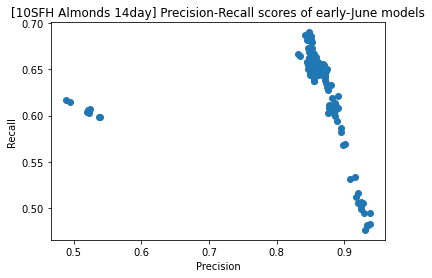

In [31]:
plt.scatter(mdfA.precision_mean, mdfA.recall_mean)  # early June problem
plt.title('[10SFH Almonds 14day] Precision-Recall scores of early-June models')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.savefig('../EarlyJune.png')

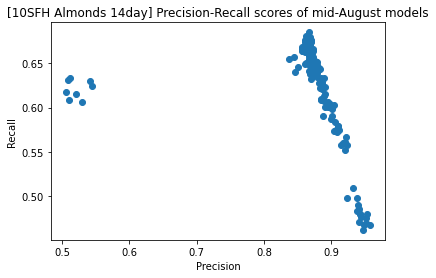

In [32]:
plt.scatter(mdfB.precision_mean, mdfB.recall_mean) 
plt.title('[10SFH Almonds 14day] Precision-Recall scores of mid-August models')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.savefig('../MidAugust.png')

In [ ]:
## best read_csv function would check which row looks like this:
## ",ActPred_00,ActPred_01,ActPred_10,ActPred_11,Precision,Recall,F1"
##### or better yet, the first 8 characters are ",ActPred"
## say it's row of index 8: then we would use pd.read_csv with skiprows=8

with open(filename) as file:
    lines = [line.rstrip() for line in file]
    
loc for loc,line in enumarate(lines) if 

In [1]:
import os, pandas as pd, matplotlib.pyplot as plt, numpy as np

In [2]:
files = os.listdir('../data/results')

In [3]:
files = [f for f in files if f[0]!='B']

In [4]:
files[0]

'ET001_0.001_0.001_10SFH_14day_75_160.csv'

In [6]:

with open('../data/results/' + files[0]) as f:
    for lineid, line in enumerate(f):
        if line[:4] == ',Act':
            nbr_to_skip = lineid
            break
    
 

In [7]:
nbr_to_skip

8

In [ ]:
    lines_first_eight = [line[:8] for line in f]

row for loc,lfe in enumarate(lines) if 

In [35]:
mdf.sort_values('f1_mean',ascending=False).head(15)

,architecture,model,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde
1504,LR,LR046,10SFH,5day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597
1384,LR,LR036,10SFH,5day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597
1501,LR,LR046,10SFH,14day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597
1500,LR,LR046,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597
1503,LR,LR046,10SFH,5day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597
1385,LR,LR036,10SFH,5day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597
1502,LR,LR046,10SFH,14day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597
1383,LR,LR036,10SFH,5day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597
1381,LR,LR036,10SFH,14day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597
1505,LR,LR046,10SFH,5day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597
